In [25]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/boston.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
len(df1.columns)

14

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     336 non-null    float64
 1   ZN       336 non-null    float64
 2   INDUS    336 non-null    float64
 3   CHAS     336 non-null    int64  
 4   NOX      336 non-null    float64
 5   RM       336 non-null    float64
 6   AGE      336 non-null    float64
 7   DIS      336 non-null    float64
 8   RAD      336 non-null    int64  
 9   TAX      336 non-null    int64  
 10  PTRATIO  336 non-null    float64
 11  B        336 non-null    float64
 12  LSTAT    336 non-null    float64
 13  target   336 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.9 KB


In [5]:
df1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop(['target'], axis=1)
y = df1['target']

In [7]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

In [8]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series:
    out_nodes = 1
else : 
    out_nodes = y.shape[1]
    
loss_function = 'mean_squared_error'

In [9]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

13

In [10]:
# 신경망 설계
model = Sequential()

model.add(Dense(30, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(out_nodes))

In [11]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습모델을 저장할 경로
path = './model/23'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [13]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [14]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=50)

In [15]:
# 학습과 검증데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=10000,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
1/1 [==============================] - 1s 850ms/step - loss: 744.9331 - val_loss: 628.4210
Epoch 2/200000
1/1 [==============================] - 0s 54ms/step - loss: 742.9155 - val_loss: 626.8395
Epoch 3/200000
1/1 [==============================] - 0s 59ms/step - loss: 740.9160 - val_loss: 625.2869
Epoch 4/200000
1/1 [==============================] - 0s 68ms/step - loss: 738.9413 - val_loss: 623.7573
Epoch 5/200000
1/1 [==============================] - 0s 56ms/step - loss: 736.9878 - val_loss: 622.2469
Epoch 6/200000
1/1 [==============================] - 0s 49ms/step - loss: 735.0488 - val_loss: 620.7628
Epoch 7/200000
1/1 [==============================] - 0s 51ms/step - loss: 733.1176 - val_loss: 619.2894
Epoch 8/200000
1/1 [==============================] - 0s 51ms/step - loss: 731.1998 - val_loss: 617.8137
Epoch 9/200000
1/1 [==============================] - 0s 51ms/step - loss: 729.2997 - val_loss: 616.3384
Epoch 10/200000
1/1 [==============================] -

In [17]:
# 리스트를 추출한다.
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

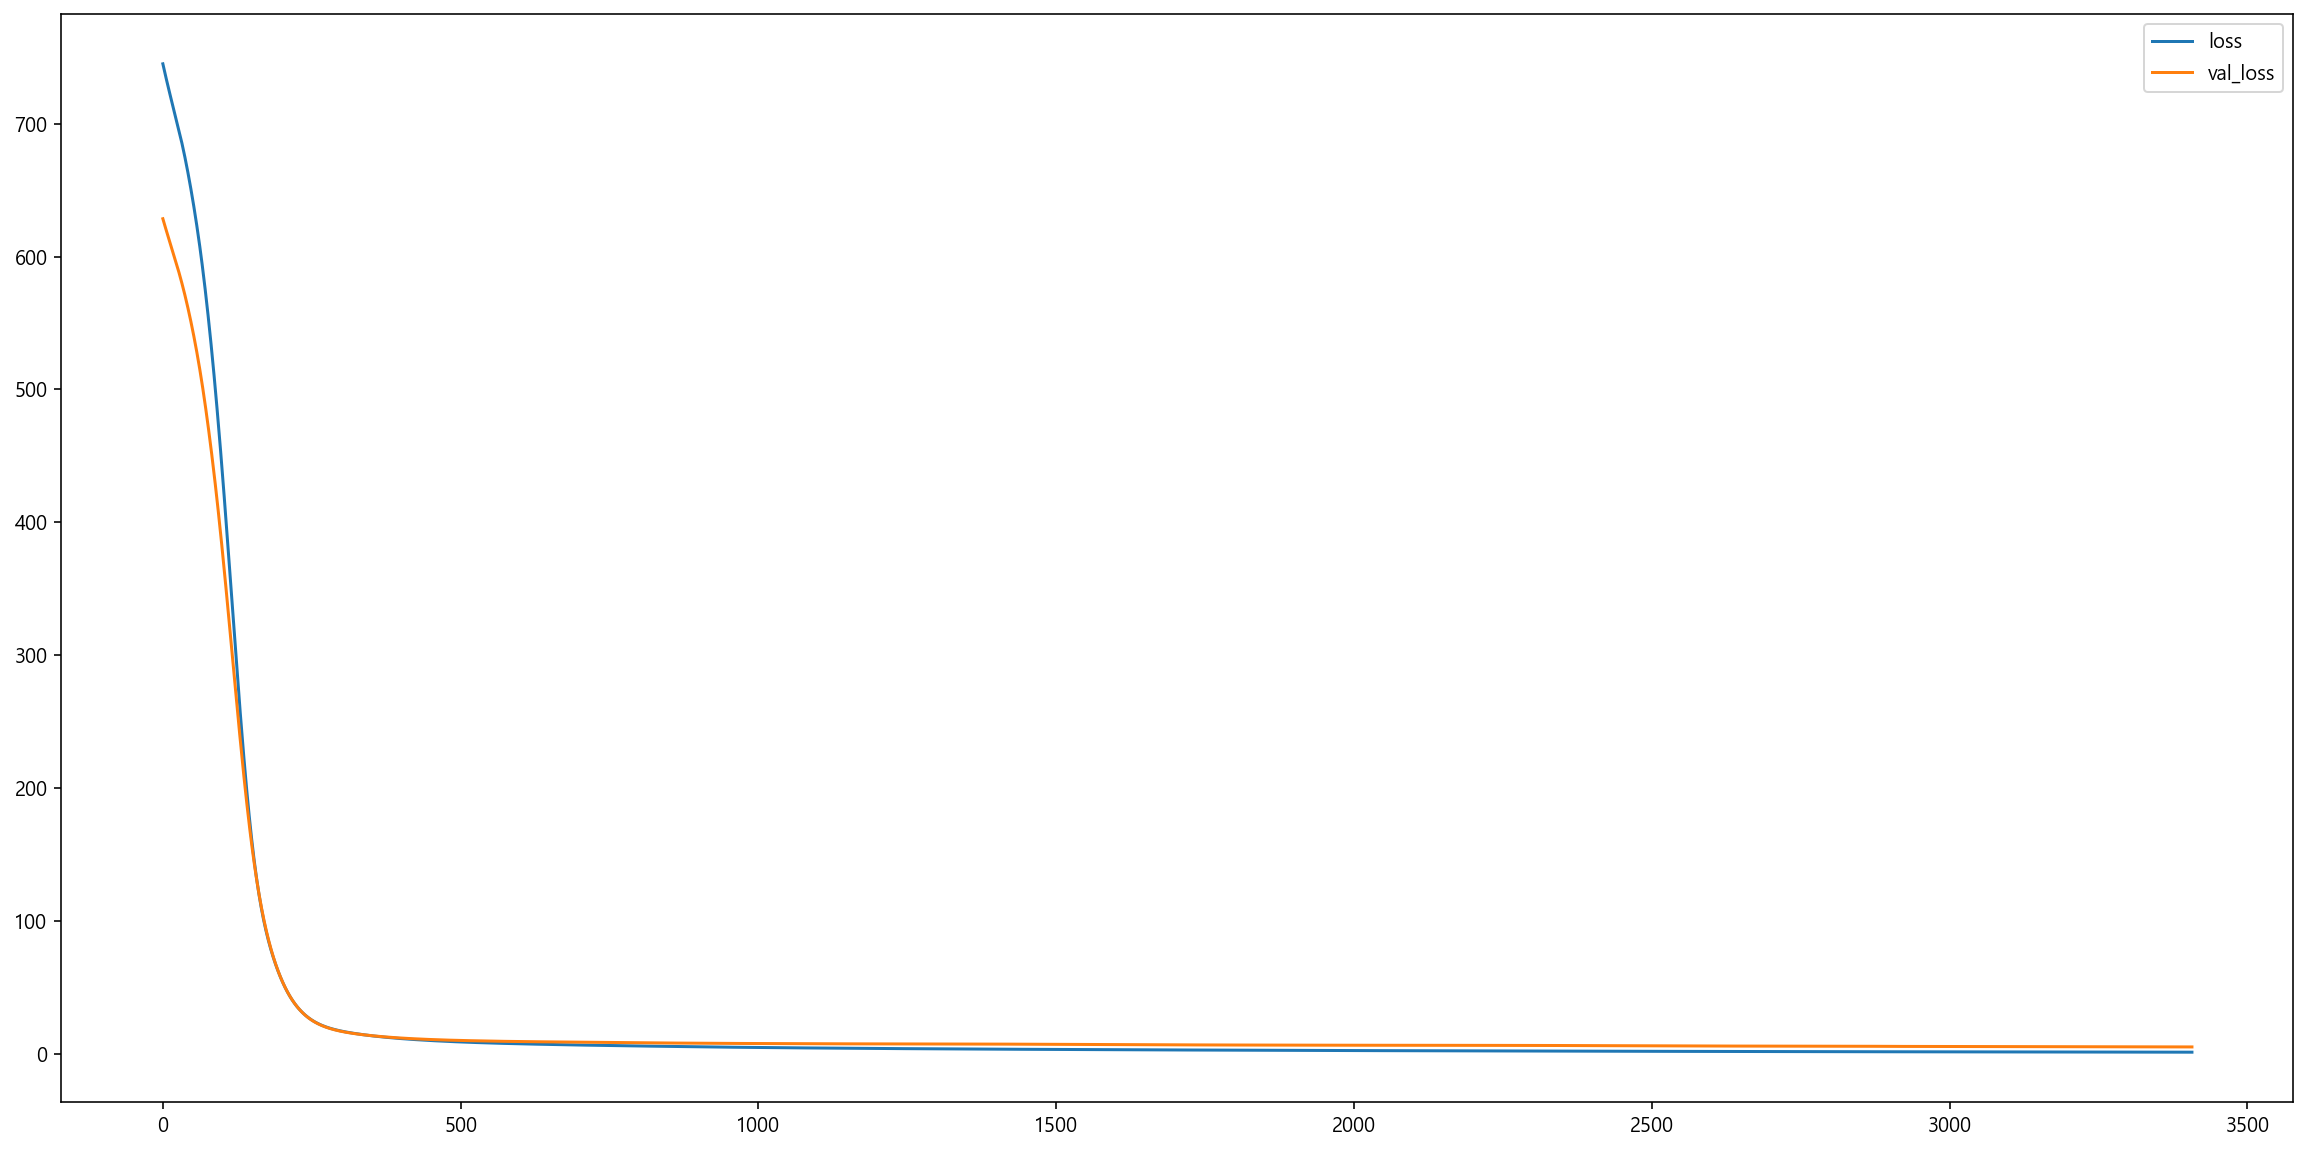

In [18]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [19]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [21]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred = best_model.predict(X_test)
pred = pred.reshape(-1)
pred

3/3 [==============================] - 0s 2ms/step


array([27.008974, 22.48224 , 21.414848, 24.061691, 36.366688, 24.255083,
       20.443396, 23.860447, 21.20243 , 22.632713, 15.882309, 19.828793,
       32.680485, 16.87709 , 15.353572, 20.391544, 25.17455 , 16.399723,
       24.958677, 31.41379 , 19.981869, 29.893864, 46.366684, 19.776493,
       23.263758, 41.83668 , 22.034344, 26.239653, 20.040258, 19.973999,
       19.705896, 20.184776, 23.67225 , 21.450773, 27.260387, 30.574125,
       22.532955, 25.589508, 28.327374, 20.42855 , 26.90081 , 22.450531,
       23.515987, 19.627491, 31.288008, 20.102024, 28.853003, 23.13171 ,
       20.362629, 20.296452, 15.937299, 19.872606, 13.237915, 20.3162  ,
       25.800358, 30.739637, 20.475569, 33.86122 , 19.260717, 26.476288,
       23.851915, 25.21828 , 26.490725, 18.149408, 20.57642 , 45.037243,
       23.977165, 19.042921], dtype=float32)

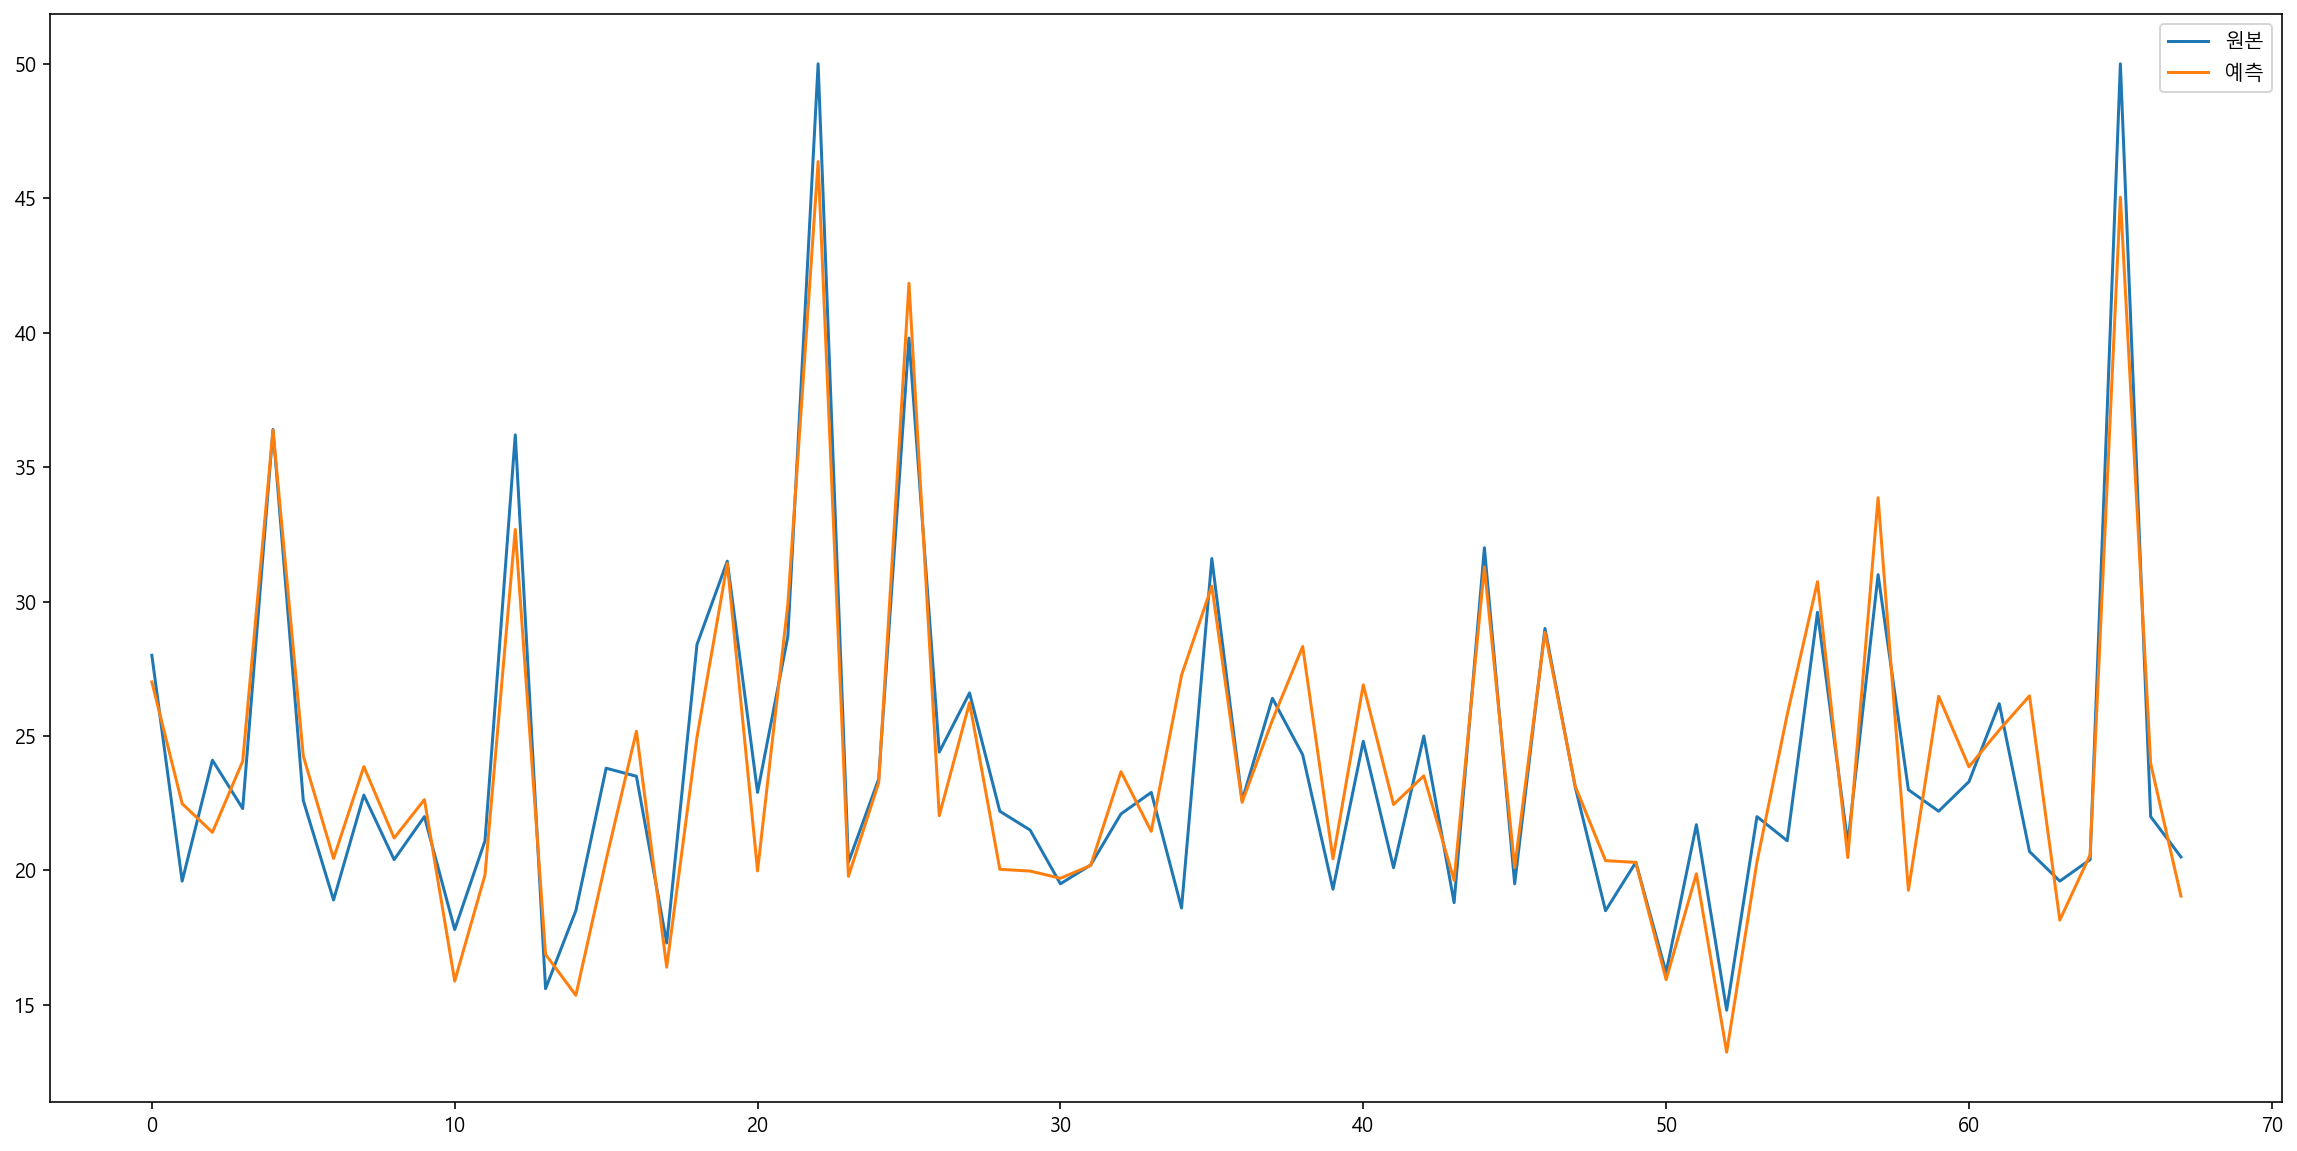

In [28]:
# 진짜 결과와 예측 결과를 시각화한다.
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='원본')
plt.plot(pred, label='예측')
plt.legend()
plt.show()

In [23]:
a1 = best_model.evaluate(X_train, y_train)
print(f'손실률 : {a1}')

9/9 [==============================] - 0s 3ms/step - loss: 1.5943
손실률 : 1.5943479537963867


In [39]:
a1 = best_model.evaluate(X_test, y_test)
print(f'손실률 : {a1}')

3/3 [==============================] - 0s 2ms/step - loss: 5.5868
손실률 : 5.58683443069458


In [29]:
# 예측할 데이터를 가져온다.
df2 = pd.read_csv('./data/boston_new.csv')
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     170 non-null    float64
 1   ZN       170 non-null    int64  
 2   INDUS    170 non-null    float64
 3   CHAS     170 non-null    int64  
 4   NOX      170 non-null    float64
 5   RM       170 non-null    float64
 6   AGE      170 non-null    float64
 7   DIS      170 non-null    float64
 8   RAD      170 non-null    int64  
 9   TAX      170 non-null    int64  
 10  PTRATIO  170 non-null    float64
 11  B        170 non-null    float64
 12  LSTAT    170 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.4 KB


In [31]:
df2.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [37]:
# 표준화
X = scaler1.fit_transform(df2)
display(X)

array([[-0.78503391, -0.26385708, -2.00129302, ...,  0.23678841,
         0.63982651, -0.96371635],
       [-0.78534015, -0.26385708, -2.00129302, ...,  0.23678841,
         0.62433663, -0.86035245],
       [-0.78512991, -0.26385708, -2.00129302, ...,  0.23678841,
         0.63419383, -1.13916297],
       ...,
       [-0.78293231, -0.26385708, -0.75933914, ...,  1.26236877,
         0.63982651, -1.52949769],
       [-0.77905833, -0.26385708, -0.75933914, ...,  1.26236877,
         0.61425708, -1.41525338],
       [-0.78399144, -0.26385708, -0.75933914, ...,  1.26236877,
         0.63982651, -1.2248462 ]])

In [38]:
# 예측한다.
pred = best_model.predict(X)
pred = pred.reshape(-1)
pred

6/6 [==============================] - 0s 2ms/step


array([41.925083 , 40.39754  , 44.38299  , 43.07584  , 41.95506  ,
       69.28832  , 54.591335 , 46.801052 , 50.137505 , 40.76868  ,
       39.260536 , 46.98499  , 52.644848 , 48.01361  , 42.391594 ,
       44.020184 , 38.061317 , 56.432068 , 46.21727  , 49.45627  ,
       29.074352 , 31.734602 , 30.891575 , 21.75843  , 24.726192 ,
       21.441587 , 19.619162 , 28.17422  , 59.19108  , 19.12349  ,
       17.49059  , 11.456705 , 24.377525 , 36.97433  , 39.887775 ,
       25.976982 , 32.331352 , 16.841232 , 13.390102 , 32.34897  ,
       21.020792 , 24.867172 , 17.560085 , 17.256718 , 38.94585  ,
       21.176838 , 16.45776  , 17.08757  , 12.101014 , 14.679414 ,
       10.594145 , 12.785763 , 14.57535  , 16.706816 , 17.003307 ,
       19.283123 , 15.2439375, 21.806026 , 17.14317  , 22.98315  ,
       22.01131  , 16.613094 , 10.406589 , 19.301785 , 12.920729 ,
       18.671352 , 19.726421 , 12.577619 , 11.247118 , 18.304958 ,
       10.511456 , 18.290495 , 16.243258 , 26.444355 , 25.8020

In [40]:
# 결과를 붙여준다.
df2['target'] = pred
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80,41.925083
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,40.397541
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51,44.382992
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74,43.075840
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29,41.955059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,36.337551
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,32.881721
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,37.581291
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,36.333843


In [41]:
# 저장한다.
df2.to_csv('./data/boston_result1.csv', index=False)